# Resampling Methods

In statistics, resampling is any of a variety of methods for doing one of the following:

* Estimating the precision of sample statistics (medians, variances, percentiles) by using subsets of available data (jackknifing) or drawing randomly with replacement from a set of data points (bootstrapping)  
* Exchanging labels on data points when performing significance tests (permutation tests, also called exact tests, randomization tests, or re-randomization tests)  
* Validating models by using random subsets (bootstrapping, cross-validation)  

## Bootstrap


Bootstrapping is a statistical method for estimating the sampling distribution] of an estimator by sampling with replacement from the original sample, most often with the purpose of deriving robust estimates of standard errors and confidence intervals of a
population parameter like a mean, median, proportion, odds ratio, correlation coefficient or regression coefficient. It has been called the **plug-in principle**, as it is the method of estimation of functionals of a population distribution by evaluating
the same functionals at the empirical distribution based on a sample. It is called a principl because it is too simple to be otherwise, it is just a guideline, not a theorem.   

![Bootstrapping](https://raw.githubusercontent.com/nikbearbrown/Google_Colab/master/img/Bootstrapping.jpg)
_plug-in principle of Bootstrapping_


It may also be used for constructing hypothesis tests. It is often used as a robust alternative to inference based on parametric assumptions when those assumptions are in doubt, or where parametric inference is impossible or requires very complicated formulas for the calculation of standard errors. Bootstrapping techniques are also used in the updating-selection transitions of particle filters, genetic type
algorithms and related resample/reconfiguration Monte Carlo methods used in computational physics.  

Todo:  Psuedocode for bootstrap and and example in python


### Cross Validation  

Usually a test set is not available so a simple strategy to create one is to split the available data into training and testing (validation set). For quantitative responses usually use MSE, for categorical can use error rate, area under the curve, F1 score, weighting of confusion matrix, etc...

## Jackknife resampling

In statistics, the jackknife is a resampling technique especially useful for variance and bias estimation. The jackknife pre-dates other common resampling methods such as the bootstrap. The jackknife estimator of a parameter is found by systematically leaving out each observation from a dataset and calculating the estimate and then finding the average of these calculations. Given a sample of size $n$, the jackknife estimate is found by aggregating the estimates of each $(n-1)$-sized sub-sample.

## Leave One Out Cross Validation

LOOCV has only one observation in the test set and uses all other n-1 observations to build a model. n different models are built leaving out each observation once and error is averaged over these n trials.  LOOCV is better than simple method above. Model is built on nearly all the data and there is no randomness in the splits since each observation will be left out once. It is computationally expensive especially with large n and a complex model.

## Cross-validation  

Cross-validation is a statistical method for validating a predictive model. Subsets of the data are held out for use as validating sets; a model is fit to the remaining data (a training set) and used to predict
for the validation set. Averaging the quality of the predictions across the validation sets yields an overall measure of prediction accuracy. Cross-validation is employed repeatedly in building decision trees.

One form of cross-validation leaves out a single observation at a time; this is similar to the _jackknife_. Another, *K*-fold cross-validation,
splits the data into *K* subsets; each is held out in turn as the validation set.

This avoids \"self-influence\". For comparison, in regression analysis methods such as linear regression, each *y* value draws the regression line toward itself, making the prediction of that value appear more accurate than it really is. Cross-validation applied to linear regression predicts the *y* value for each observation without using that observation.


## *K*-fold cross validation  

Similar to LOOCV but this time you leave some number greater than 1 out. Here, k is the number of partitions of your sample, so if you have 1000 observations and k = 10, the each fold will be 100. These 100 observations would act as your test set. Get an MSE for each fold of these 100 observations and take the average. LOOCV is a special case of k-fold CV whenever k equals the number of observations.

## bias-variance tradeoff between LOOCV and k-folds  

Since LOOCV trains on nearly all the data, the test error rate will generally be lower than k-fold and there for less biased. LOOCV will have higher variance since all n models will be very highly correlated to one another. Since the models won't differ much, the test error rate (which what CV is measuring) will vary more than k-fold which has fewer models that are less correlated with one another. A value of k between 5 and 10 is a good rule of thumb that balances the trade-off between bias and variance

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Questions

### 1. Using basic statistical properties of the variance, as well as singlevariable calculus, derive

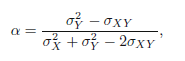

### In other words, prove that α given by the above equation does indeed minimize $$Var(\alpha X + (1 - \alpha)Y)$$


### Solution:
Properties of variance and covariance
$$=Var(\alpha X) + Var((1 - \alpha)Y) + 2Cov(\alpha X, (1 - \alpha)Y)$$
$$=\alpha^2Var(X) + (1 - \alpha)^2Var(Y) + 2(\alpha)(1 - \alpha)(Cov(X, Y)$$

Take derivative and set to 0
$$2\alpha Var(X) - 2(1 - \alpha)Var(Y) + (2 - 4\alpha)Cov(X, Y) = 0$$
Collect terms
$$2\alpha Var(X) + 2 \alpha Var(Y) - 4\alpha Cov(X, Y) = 2Var(Y) - 2Cov(X, Y)$$
Solve for $\alpha$
$$\alpha = \frac{Var(Y) - Cov(X, Y)}{Var(X) + Var(Y) - 2Cov(X, Y)}$$

### 2. We will now derive the probability that a given observation is part of a bootstrap sample. Suppose that we obtain a bootstrap sample from a set of n observations.
(a) What is the probability that the first bootstrap observation is
not the jth observation from the original sample? Justify your
answer.

(b) What is the probability that the second bootstrap observation
is not the jth observation from the original sample?

(c) Argue that the probability that the jth observation is not in the
bootstrap sample is (1 − 1/n)n.

(d) When n = 5, what is the probability that the jth observation is
in the bootstrap sample?

(e) When n = 100, what is the probability that the jth observation
is in the bootstrap sample?


### Soutions:
a) $\frac{n-1}{n}$  
b) $\frac{n-1}{n}$  
c) Since bootstrapping is sampling with replace, the probability of being any jth obsevation is $\frac{1}{n}$. The probability of not being the jth observation is $1 - \frac{1}{n}$. Since each draw is independent we can just multiply the probabilities together to get the probability that the jth observation is not in the sample at all

In [ ]:
#2 c-f
[(1 - 1/n) **n for n in [5, 100, 10000, 100000]]

[0.3276800000000001,
 0.3660323412732292,
 0.36786104643297046,
 0.3678776017682465]

In [ ]:
x = np.arange(1, 100001)
y = (1 - 1/x) ** x

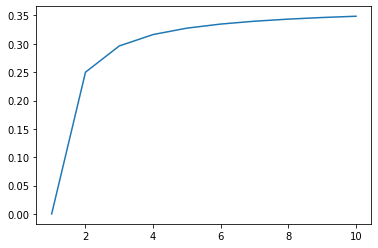

In [ ]:
plt.plot(x[:10], y[:10])

In [ ]:
#2h
# make 10,000 samples of 100 elements each sample from integers 1 - 100
# check if 4 is each sample. Take mean.
# Looks like very close to theoretical probability
data = np.random.randint(1, 101, (100, 10000))
np.any(data == 4, axis=0).mean()

0.6274

###3. We now review k-fold cross-validation.

(a) Explain how k-fold cross-validation is implemented.

(b) What are the advantages and disadvantages of k-fold crossvalidation relative to:

i. The validation set approach?

ii. LOOCV?

### Solutions:
a) K-fold CV works by taking the dataset given and randomly splitting it into k non-overlapping datasets. You can shuffle the data first and then just split at regular intervals. Train K models. For each model, use the kth region as the validation set and build on the other k-1 sets. Take the mean of the k errors found to estimate the true test error.  

b i) Advantage to validation set is that there are more test sets to validate on which should reduce the bias of what the overall error actually is. Variance should also decrease as the validation set approach is just one split of the data and that split could not represent the test data well. Disadvantage is training more models.  

b ii) Advantage to LOOCV is a decrease in variance as the k models are not as highly correlated as the each LOOCV model is. Also, K-folds is computationally less expensive. 

### 4. Suppose that we use some statistical learning method to make a prediction for the response Y for a particular value of the predictor X. Carefully describe how we might estimate the standard deviation of our prediction.

### Answer:
* Using the bootstrap, create many (say 10,000) samples of your data.
* Create each sample by drawing n times (where n is number of observations in your original) with replacement.
* Build your model for each sample and calculate the mean and standard deviation of estimated parameters

### 5. Earlier, we used logistic regression to predict the probability of default using income and balance on the Default data set. We will now estimate the test error of this logistic regression model using the validation set approach. Do not forget to set a random seed before beginning your analysis.



### (a) Fit a logistic regression model that uses income and balance to predict default.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import pandas as pd

In [ ]:
default = pd.read_csv('https://raw.githubusercontent.com/nikbearbrown/Google_Colab/master/data/default.csv')
default['student_yes'] = (default['student'] == 'Yes').astype('int')
default['default_yes'] = (default['default'] == 'Yes').astype('int')

In [ ]:
default.head()

,default,student,balance,income,student_yes,default_yes
0,No,No,729.526495,44361.625074,0,0
1,No,Yes,817.180407,12106.134700,1,0
2,No,No,1073.549164,31767.138947,0,0
3,No,No,529.250605,35704.493935,0,0
4,No,No,785.655883,38463.495879,0,0


In [ ]:
X = default[['balance', 'income']]
y = default['default_yes']

# No Validation set

### Sklearn

In [ ]:
# Notice how tol must be changed to less than default value or convergence won't happen
# Use a high value of C to remove regularization
model = LogisticRegression(C=100000, tol=.0000001)
model.fit(X, y)
model.intercept_, model.coef_

(array([-11.54046839]), array([[5.64710291e-03, 2.08089921e-05]]))

### Statsmodels
Coefficients are similar

In [ ]:
import statsmodels.formula.api as smf

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
result = smf.logit(formula='default_yes ~ balance + income', data=default).fit()

Optimization terminated successfully.
         Current function value: 0.078948
         Iterations 10


In [ ]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            default_yes   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9997
Method:                           MLE   Df Model:                            2
Date:                Mon, 21 Sep 2020   Pseudo R-squ.:                  0.4594
Time:                        06:03:04   Log-Likelihood:                -789.48
converged:                       True   LL-Null:                       -1460.3
Covariance Type:            nonrobust   LLR p-value:                4.541e-292
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -11.5405      0.435    -26.544      0.000     -12.393     -10.688
balance        0.0056      0.000     24.835      0.000       0.005       0.006
income      2.081e-05   4.99e-06      4.174      0.000     1.1e-05    3.06e-05
==============================================================================

Possibly complete quasi-separation: A fraction 0.14 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

### Error without validation set
This is an in-sample prediction. Training error in both sklearn and statsmodels. Both are equivalent

In [ ]:
(model.predict(X) == y).mean()

0.9737

In [ ]:
((result.predict(X) > .5) * 1 == y).mean()

0.9737

###(b) Using the validation set approach, estimate the test error of this model. In order to do this, you must perform the following steps: 
i. Split the sample set into a training set and a validation set.

ii. Fit a multiple logistic regression model using only the training
observations.

iii. Obtain a prediction of default status for each individual in
the validation set by computing the posterior probability of
default for that individual, and classifying the individual to
the default category if the posterior probability is greater
than 0.5.

iv. Compute the validation set error, which is the fraction of
the observations in the validation set that are misclassified.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [ ]:
model = LogisticRegression(C=100000, tol=.0000001)
model.fit(X_train, y_train)
model.intercept_, model.coef_

(array([-1.56156741e-06]), array([[ 0.00033632, -0.00012504]]))

In [ ]:
X_train_sm = X_train.join(y_train)

In [ ]:
result = smf.logit(formula='default_yes ~ balance + income', data=X_train_sm).fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.078708
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            default_yes   No. Observations:                 7500
Model:                          Logit   Df Residuals:                     7497
Method:                           MLE   Df Model:                            2
Date:                Mon, 21 Sep 2020   Pseudo R-squ.:                  0.4352
Time:                        06:03:04   Log-Likelihood:                -590.31
converged:                       True   LL-Null:                       -1045.1
Covariance Type:            nonrobust   LLR p-value:                3.068e-198
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -11.2449      0.495    -22.704      0.000     -12.216     -10.274
balance        0.0054      0.000     21.084      0.000       0.005       0.006
income      2.132e-05   5.84e-06      3.653      0.000    9.88e-06    3.28e-05
==============================================================================

Possibly complete quasi-separation: A fraction 0.12 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [ ]:
# Nearly the same as training set. So not too much over fitting has happened
(model.predict(X_test) == y_test).mean(), ((result.predict(X_test) > .5) * 1 == y_test).mean()

(0.9604, 0.9744)

Validation error of only .0272

### (c) Repeat the process in (b) three times, using three different splits of the observations into a training set and a validation set. Comment on the results obtained.

In [ ]:
# c) repeat for 3 different validation sets
model = LogisticRegression(C=100000, tol=.0000001)

for i in range(3):
    X_train, X_test, y_train, y_test = train_test_split(X, y)
    model.fit(X_train, y_train)
    
    X_train_sm = X_train.join(y_train)
    result = smf.logit(formula='default_yes ~ balance + income', data=X_train_sm).fit()
    print((model.predict(X_test) == y_test).mean(), ((result.predict(X_test) > .5) * 1 == y_test).mean())

Optimization terminated successfully.
         Current function value: 0.081600
         Iterations 10
0.9684 0.9752
Optimization terminated successfully.
         Current function value: 0.079349
         Iterations 10
0.9756 0.9756
Optimization terminated successfully.
         Current function value: 0.078415
         Iterations 10
0.9632 0.9704


### (d) Now consider a logistic regression model that predicts the probability of default using income, balance, and a dummy variablefor student. Estimate the test error for this model using the validation set approach. Comment on whether or not including a dummy variable for student leads to a reduction in the test error rate.

In [ ]:
# d) include student in model
X = default[['balance', 'income', 'student_yes']]
y = default['default_yes']

model = LogisticRegression(C=100000, tol=.0000001)

for i in range(3):
    X_train, X_test, y_train, y_test = train_test_split(X, y)
    model.fit(X_train, y_train)
    
    X_train_sm = X_train.join(y_train)
    result = smf.logit(formula='default_yes ~ balance + income + student_yes', data=X_train_sm).fit()
    print((model.predict(X_test) == y_test).mean(), ((result.predict(X_test) > .5) * 1 == y_test).mean())

Optimization terminated successfully.
         Current function value: 0.081802
         Iterations 10
0.9708 0.9784
Optimization terminated successfully.
         Current function value: 0.082798
         Iterations 10
0.9704 0.9776
Optimization terminated successfully.
         Current function value: 0.078762
         Iterations 10
0.9664 0.97


Looks like error rate is very similar

### 6. Computing stand errors of coefficents of logistic regression using bootstrap

We continue to consider the use of a logistic regression model to
predict the probability of default using income and balance on the
Default data set. In particular, we will now compute estimates for
the standard errors of the income and balance logistic regression coefficients
in two different ways: (1) using the bootstrap, and (2) using
the standard formula for computing the standard errors in the glm()
function. Do not forget to set a random seed before beginning your
analysis.

(a) Using the summary() and glm() functions, determine the estimated
standard errors for the coefficients associated with income
and balance in a multiple logistic regression model that uses
both predictors.

(b) Write a function, boot.fn(), that takes as input the Default data
set as well as an index of the observations, and that outputs
the coefficient estimates for income and balance in the multiple
logistic regression model.

(c) Use the boot() function together with your boot.fn() function to
estimate the standard errors of the logistic regression coefficients
for income and balance.

(d) Comment on the estimated standard errors obtained using the
glm() function and using your bootstrap function.

In [ ]:
result = smf.logit(formula='default_yes ~ balance + income', data=default).fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.078948
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            default_yes   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9997
Method:                           MLE   Df Model:                            2
Date:                Mon, 21 Sep 2020   Pseudo R-squ.:                  0.4594
Time:                        06:03:05   Log-Likelihood:                -789.48
converged:                       True   LL-Null:                       -1460.3
Covariance Type:            nonrobust   LLR p-value:                4.541e-292
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -11.5405      0.435    -26.544      0.000     -12.393     -10.688
balance        0.0056      0.000     24.835      0.000       0.005       0.006
income      2.081e-05   4.99e-06      4.174      0.000     1.1e-05    3.06e-05
==============================================================================

Possibly complete quasi-separation: A fraction 0.14 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [ ]:
df_params = pd.DataFrame(columns=['Intercept', 'balance', 'income'])
for i in range(100):
    default_sample = default.sample(len(default), replace=True)
    result_sample = smf.logit(formula='default_yes ~ balance + income', data=default_sample).fit(disp=0)
    df_params = df_params.append(result_sample.params, ignore_index=True)

In [ ]:
# bootstrap parameters and standard error
df_params.mean(), df_params.std()

(Intercept   -11.620645
 balance       0.005682
 income        0.000021
 dtype: float64, Intercept    0.374106
 balance      0.000209
 income       0.000005
 dtype: float64)

In [ ]:
# model parameters and standard error
result.params, result.bse

(Intercept   -11.540468
 balance       0.005647
 income        0.000021
 dtype: float64, Intercept    0.434772
 balance      0.000227
 income       0.000005
 dtype: float64)

Standard errors are a wee bit higher in bootstrap

# 7
a) Fit Logistic Regression with Lag1, Lag2

In [ ]:
weekly = pd.read_csv('https://raw.githubusercontent.com/nikbearbrown/Google_Colab/master/data/weekly.csv')

In [ ]:
weekly['Direction_Up'] = (weekly['Direction'] == 'Up').astype(int)

In [ ]:
weekly.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction,Direction_Up
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down,0
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down,0
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up,1
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up,1
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up,1


In [ ]:
X = weekly[['Lag1', 'Lag2']]
y = weekly['Direction_Up']

In [ ]:
model = LogisticRegression(C=100000, tol=.0000001)
model.fit(X, y)

LogisticRegression(C=100000, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=1e-07, verbose=0,
                   warm_start=False)

In [ ]:
model.intercept_, model.coef_

(array([0.22122405]), array([[-0.03872222,  0.0602483 ]]))

In [ ]:
# accuracy
(model.predict(X) == y).mean()

0.5555555555555556

### b) Fit without first observation

In [ ]:
# model is different but nearly identical
model.fit(X.iloc[1:], y.iloc[1:])
model.intercept_, model.coef_, (model.predict(X) == y).mean()

(array([0.22324305]), array([[-0.03843317,  0.06084763]]), 0.5564738292011019)

In [ ]:
# c
# wrong prediction
model.predict([X.iloc[0]]), y[0]

(array([1]), 0)

In [ ]:
# d
errors = np.zeros(len(X))
for i in range(len(X)):
    leave_out  = ~X.index.isin([i])
    model.fit(X[leave_out], y[leave_out])
    if model.predict([X.iloc[i]]) != y[i]:
        errors[i] = 1

In [ ]:
# e
errors.mean()

0.44995408631772266

## 8. We will now perform cross-validation on a simulated data set.
###(a) Generate a simulated data set.

In [ ]:
np.random.seed(1)
x = np.random.randn(100)
e = np.random.randn(100)
y = x - 2*x**2 + e

In [ ]:
y.shape

(100,)

### (b) Create a scatterplot of X against Y . Comment on what you find.

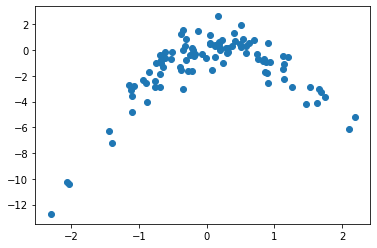

In [ ]:
plt.scatter(x, y);

### (c) Set a random seed, and then compute the LOOCV errors that result from fitting the following four models using least squares:
i. Y = β0 + β1X + ǫ

ii. Y = β0 + β1X + β2X2 + ǫ

iii. Y = β0 + β1X + β2X2 + β3X3 + ǫ

iv. Y = β0 + β1X + β2X2 + β3X3 + β4X4 + ǫ.

Note you may find it helpful to use the data.frame() function
to create a single data set containing both X and Y .

In [ ]:
df = pd.DataFrame(np.array([np.ones(len(x)), x, x ** 2, x ** 3, x ** 4, y]).T, columns=['b0', 'x', 'x2', 'x3', 'x4', 'y'])
df.head()

,b0,x,x2,x3,x4,y
0,1.0,-0.416758,0.173687,-0.072385,0.030167,0.397389
1,1.0,-0.056267,0.003166,-0.000178,0.000010,0.323479
2,1.0,-2.136196,4.563334,-9.748176,20.824015,-12.395997
3,1.0,1.640271,2.690488,4.413129,7.238727,-3.307613
4,1.0,-1.793436,3.216411,-5.768426,10.345301,-8.530344


In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
X = df.iloc[:, :5]
y = df['y']
model = LinearRegression()
errors = np.zeros((len(X), 4))
for i in range(len(X)):
    leave_out  = ~X.index.isin([i])
    for j in range(4):
        model.fit(X.iloc[leave_out, :j+2], y[leave_out])
        errors[i, j] = (model.predict([X.iloc[i, :j+2]]) - y[i]) ** 2

In [ ]:
# each error here is average error for linear, quadratic, cubic and quartic model.
# Looks like it stabilizes at quadratic.
errors.mean(axis=0)

array([6.26076433, 0.91428971, 0.92687688, 0.86691169])

In [ ]:
# again with different seed. 
np.random.seed(2)
x = np.random.randn(100)
e = np.random.randn(100)
y = x - 2*x**2 + e
df = pd.DataFrame(np.array([np.ones(len(x)), x, x ** 2, x ** 3, x ** 4, y]).T, columns=['b0', 'x', 'x2', 'x3', 'x4', 'y'])


X = df.iloc[:, :5]
y = df['y']
model = LinearRegression()
errors = np.zeros((len(X), 4))
for i in range(len(X)):
    leave_out  = ~X.index.isin([i])
    for j in range(4):
        model.fit(X.iloc[leave_out, :j+2], y[leave_out])
        errors[i, j] = (model.predict([X.iloc[i, :j+2]]) - y[i]) ** 2

# quite a different average error. But again stabilizes at quadratic which makes sense
errors.mean(axis=0)

array([11.61020827,  1.26528394,  1.28204182,  1.31659158])

### f. Comment on the statistical significance of the coefficient estimates that results from fitting each of the models in (c) using least squares. Do these results agree with the conclusions drawn based on the cross-validation results?

### Answer:
since the error doesn't improve after quadratic it's likely the 
standard errors for x3 and x4 would not be significant

## 9. We will now consider the Boston housing data set, from the MASS library.

In [ ]:
boston = pd.read_csv('https://raw.githubusercontent.com/nikbearbrown/Google_Colab/master/data/boston.csv')
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


### (a) Based on this data set, provide an estimate for the population mean of medv. Call this estimate ˆμ.

In [ ]:
#a
boston['medv'].mean()

22.532806324110698

### (b) Provide an estimate of the standard error of ˆμ. Interpret this result.
Hint: We can compute the standard error of the sample mean by
dividing the sample standard deviation by the square root of the
number of observations.

In [ ]:
#b 
# standard deviation of mean
boston['medv'].std() / np.sqrt(len(boston))

0.4088611474975351

### (c) Now estimate the standard error of ˆμ using the bootstrap. How does this compare to your answer from (b)?

In [ ]:
#c
#bootstrap standard deviation of mean
means = [boston['medv'].sample(n = len(boston), replace=True).mean() for i in range(1000)]
np.std(means)

0.39792811024263747

### (d) Based on your bootstrap estimate from (c), provide a 95% confidence interval for the mean of medv. Compare it to the results obtained using t.test(Boston$medv).
Hint: You can approximate a 95% confidence interval using the
formula [ˆμ − 2SE(ˆμ), ˆμ + 2SE(ˆμ)].

In [ ]:
#d
se = np.std(means)
boston['medv'].mean() - 2 * se, boston['medv'].mean() + 2 * se

(21.736950103625425, 23.32866254459597)

http://stackoverflow.com/questions/15033511/compute-a-confidence-interval-from-sample-data

In [ ]:
import scipy.stats as st

In [ ]:
st.t.interval(0.95, len(boston['medv'])-1, loc=np.mean(boston['medv']), scale=st.sem(boston['medv']))

(21.729528014578616, 23.33608463364278)

### (e) Based on this data set, provide an estimate, ˆμmed, for the median value of medv in the population.

In [ ]:
#e
boston['medv'].median()

21.2

### (f) We now would like to estimate the standard error of ˆμmed. Unfortunately, there is no simple formula for computing the standar error of the median. Instead, estimate the standard error of the median using the bootstrap. Comment on your findings.

In [ ]:
#f
medians = [boston['medv'].sample(n = len(boston), replace=True).median() for i in range(1000)]
np.std(medians)

0.36780536972697897

### (g) Based on this data set, provide an estimate for the tenth percentile of medv in Boston suburbs. Call this quantity ˆμ0.1. (You can use the quantile() function.)

In [ ]:
#g
boston['medv'].quantile(.1)

12.75

### (h) Use the bootstrap to estimate the standard error of ˆμ0.1. Comment on your findings.

In [ ]:
#h
quantile_10 = [boston['medv'].sample(n = len(boston), replace=True).quantile(.1) for i in range(1000)]
np.std(quantile_10)

0.4996360575458901

### End of Chapter 5